# RQ4
###### What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get


In [3]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-02.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-03.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-04.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-05.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-06.csv", encoding = 'latin-1')

In [4]:
M1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


###### FROM THE LEGEND OF THE COLUMN WE KNOW WHAT EACH NUMBER MEANS:

A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

The pickup boroughs are taken into consideration
to answer this question, we need two(or maybe three) columns. So, we drop the others. 
keep payment_type, PULocationID, total_amount



In [5]:
#dropping vs keeping the ones I need?
#df.drop(columns=['', 'C'])
M2 = M1.filter(['payment_type', 'PULocationID', 'total_amount'])
#free the memory from this big object M1 is! 
del M1

In [6]:
M2.head()

,payment_type,PULocationID,total_amount
0,2,41,5.80
1,2,239,15.30
2,1,262,8.30
3,2,140,34.80
4,1,246,16.55


In [7]:
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')

In [8]:
borough

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [9]:
#the key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 
#How to merge these two dataframes when two columns' keys are not in the same order?

result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()


,payment_type,PULocationID,total_amount,LocationID,Borough
0,2,41,5.80,41,Manhattan
1,2,41,9.80,41,Manhattan
2,2,41,5.30,41,Manhattan
3,1,41,60.66,41,Manhattan
4,1,41,36.36,41,Manhattan


In [10]:
#now we can discard IDs to have the df that we want to work with
M3 = result.drop(['LocationID','PULocationID'],1)
M3.head()

,payment_type,total_amount,Borough
0,2,5.80,Manhattan
1,2,9.80,Manhattan
2,2,5.30,Manhattan
3,1,60.66,Manhattan
4,1,36.36,Manhattan


Now that we have our df, we start to look at it.


In [11]:
M3.describe(include='all')

,payment_type,total_amount,Borough
count,8.759874e+06,8.759874e+06,8759874
unique,NaN,NaN,7
top,NaN,NaN,Manhattan
freq,NaN,NaN,7965703
mean,1.310611e+00,1.549098e+01,NaN
std,4.817818e-01,1.419540e+01,NaN
min,1.000000e+00,-4.503000e+02,NaN
25%,1.000000e+00,8.300000e+00,NaN
50%,1.000000e+00,1.130000e+01,NaN
75%,2.000000e+00,1.662000e+01,NaN


As we see, payment type are treated as nummerical data we would like to have that as a cathegory.

In [12]:
columns=[]
index= [0,1,2,3,4,5]
typeofpay=pd.DataFrame(index=index, columns=columns)


In [13]:
ID=list(range(1,7))
ID

[1, 2, 3, 4, 5, 6]

In [14]:
typeofpay['ID']=ID
typeofpay['wayofpay']=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip']
typeofpay

,ID,wayofpay
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute
4,5,Unknown
5,6,Voided trip


Now we have a df to merge with our data

In [15]:
M4 = pd.merge(M3,
              typeofpay,
              left_on='payment_type',
              right_on='ID',
              how='inner')
M5=M4.drop(['payment_type'], 1)
M5.head()

,total_amount,Borough,ID,wayofpay
0,5.8,Manhattan,2,Cash
1,9.8,Manhattan,2,Cash
2,5.3,Manhattan,2,Cash
3,12.8,Manhattan,2,Cash
4,33.8,Manhattan,2,Cash


Now we can rerun describe to extract some info

In [16]:
M5.wayofpay.describe()

count         8759874
unique              4
top       Credit card
freq          6105871
Name: wayofpay, dtype: object

In [17]:
M5.wayofpay.unique()

array(['Cash', 'Credit card', 'No charge', 'Dispute'], dtype=object)

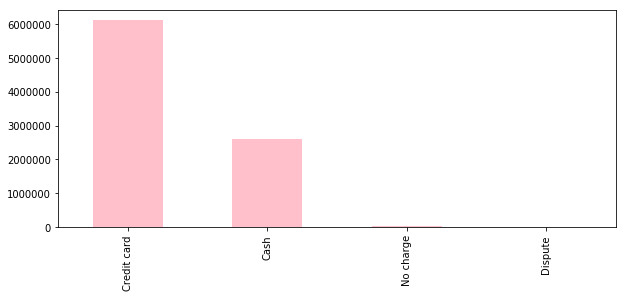

In [18]:
M5['wayofpay'].value_counts().plot(kind='bar', figsize=(10,4), color='pink')

Now we know something more: Credit card is by far (more than 60% of the payments) the most common way to pay. Almost the totality of the other fairs is payed in cash.
Our dataframe has only four unique value: Unknown and voided trip are missing.

Borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
EWR              AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Unknown          AxesSubplot(0.125,0.125;0.775x0.755)
Name: ID, dtype: object

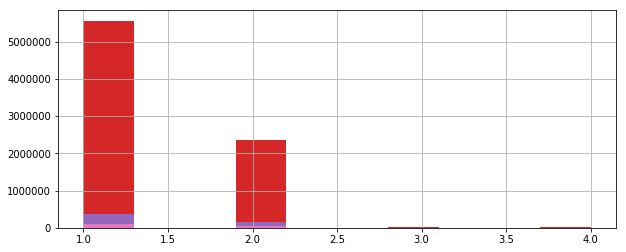

In [19]:
M5.groupby('Borough')['ID'].hist(figsize=(10,4))